<a href="https://colab.research.google.com/github/Dil2001/ConsoleApp1/blob/master/CNN_Model_to_Classify_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**02.Zipping & Uploading to Google Colab**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


**03.Unzip the uploaded file**

In [8]:
import zipfile
import os
with zipfile.ZipFile('/content/images.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

**04.Preprocess the images**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')
val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 172 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


**05.Build CNN using Keras**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your dataset has 2 classes, adjust the final Dense layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Changed to 2 output neurons
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**06.Train the CNN model**

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Print filenames to check for any problematic files
for i in range(len(train_generator.filenames)):
    print(train_generator.filenames[i])

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 172 images belonging to 2 classes.
__MACOSX/images/chair/._000022.jpg
__MACOSX/images/chair/._000023.jpg
__MACOSX/images/chair/._000024.jpg
__MACOSX/images/chair/._000025.jpg
__MACOSX/images/chair/._000026.jpg
__MACOSX/images/chair/._000027.jpg
__MACOSX/images/chair/._000028.jpg
__MACOSX/images/chair/._000029.jpg
__MACOSX/images/chair/._000030.jpg
__MACOSX/images/chair/._000031.jpg
__MACOSX/images/chair/._000032.jpg
__MACOSX/images/chair/._000033.jpg
__MACOSX/images/chair/._000034.jpg
__MACOSX/images/chair/._000035.jpg
__MACOSX/images/chair/._000036.jpg
__MACOSX/images/chair/._000037.jpg
__MACOSX/images/flower_vase/._000001.jpg
__MACOSX/images/flower_vase/._000002.jpg
__MACOSX/images/flower_vase/._000003.jpeg
__MACOSX/images/flower_vase/._000004.jpg
__MACOSX/images/flower_vase/._000005.jpg
__MACOSX/images/flower_vase/._000006.jpg
__MACOSX/images/flower_vase/._000007.jpg
__MACOSX/images/flower_vase/._000008.jpg
__MACOSX/images/flower_vase/._000009.jpg
__MACOSX/images/flower_vase/.

In [24]:
import os
from PIL import Image

image_dir = 'dataset'  # or your actual dataset path

def remove_corrupted_images(image_dir):
    num_deleted = 0
    for root, _, files in os.walk(image_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # just verify without loading full image
            except Exception as e:
                print(f"Deleted corrupted file: {file_path} ({e})")
                os.remove(file_path)
                num_deleted += 1
    print(f"✅ Removed {num_deleted} corrupted/bad images.")

remove_corrupted_images(image_dir)

✅ Removed 0 corrupted/bad images.


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Print filenames to check for any problematic files
for i in range(len(train_generator.filenames)):
    print(train_generator.filenames[i])

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 86 images belonging to 2 classes.
images/chair/000022.jpg
images/chair/000023.jpg
images/chair/000024.jpg
images/chair/000025.jpg
images/chair/000026.jpg
images/chair/000027.jpg
images/chair/000028.jpg
images/chair/000029.jpg
images/chair/000030.jpg
images/chair/000031.jpg
images/chair/000032.jpg
images/chair/000033.jpg
images/chair/000034.jpg
images/chair/000035.jpg
images/chair/000036.jpg
images/chair/000037.jpg
images/flower_vase/000001.jpg
images/flower_vase/000002.jpg
images/flower_vase/000003.jpeg
images/flower_vase/000004.jpg
images/flower_vase/000005.jpg
images/flower_vase/000006.jpg
images/flower_vase/000007.jpg
images/flower_vase/000008.jpg
images/flower_vase/000009.jpg
images/flower_vase/000010.jpg
images/flower_vase/000011.jpg
images/flower_vase/000012.jpg
images/flower_vase/000013.jpg
images/flower_vase/000014.jpg
images/flower_vase/000015.jpg
images/flower_vase/000016.jpg
images/flower_vase/000017.jpg
images/flower_vase/000018.jpg
images/flower_vase/000019.jpg
image

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=100)

Epoch 1/100
2/3 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2037 - loss: 0.6415     

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4158 - loss: 0.4707 - val_accuracy: 1.0000 - val_loss: 1.7030e-08
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 690ms/step - accuracy: 1.0000 - loss: 8.7148e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 986ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 815ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 728ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 940ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step - accuracy: 1.0000 - loss

**08.Plot accuracy and loss**

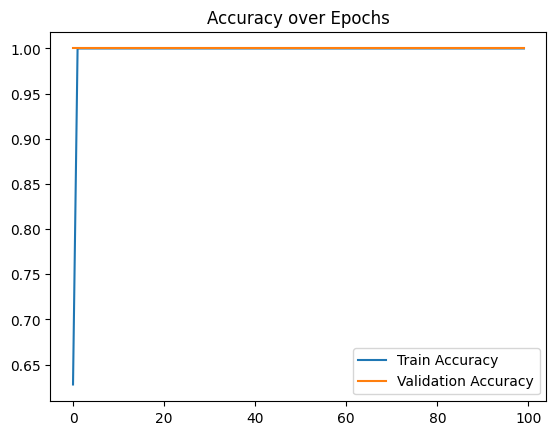

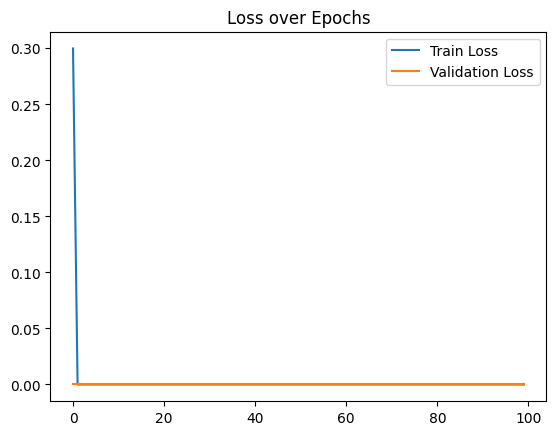

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [33]:
!pip install icrawler
from icrawler.builtin import BingImageCrawler

def download_images(query, folder, max_num=10):
    print(f"Downloading {max_num} images of '{query}' into '{folder}'...")
    crawler = BingImageCrawler(storage={'root_dir': folder})
    crawler.crawl(keyword=query, max_num=max_num)

# Download 10 images each
download_images('bag', 'images/bag', 10)
download_images('pen', 'images/pen', 10)
download_images('pencil', 'images/pencil', 10)